In the first 2 learning units, we saw the so-called **Bag of Words** vectorization of text. Text is transformed in vectors, constituted by counts or frequencies of words. This representation has the advantage of being simple and lasted for a very long time.

A possible improvement to this idea is, instead of considering single words, to consider sequences of them. So, you can create features for 2 consecutives words, or even 3. You can even consider sequences of letters, or phonems. This approach is called **n-grams** reprensentation, and it could be very effective as well. Since we are not going to cover it in this material, you can find very interesting explanation [here MISSING LINK]().

An important breakthrough in text representation has been made during recent past by using deep learning. The family of algorithms called **word2vec** is based on training neural network to automatically learn the more informative representation for text data. The networks are trained to produce vectors that embed semantic information extracted from text. For example,  words with similar meaning produces vectors that are close to one another in the vector space.

In [37]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

# GenSim
import gensim

Train those kind of models is **very** computationally expensive. The good news is that, once trained by those guys with the big computers, we can happily uses the trained models to project text to the feature space. 

Thankfully, we can go [here](http://nlpserver2.inf.ufrgs.br/alexandres/vectors/lexvec.enwiki%2bnewscrawl.300d.W.pos.vectors.gz) and download a LexVec word embedding model (similar to word2vec and [GloVe](https://nlp.stanford.edu/projects/glove/)) pre-trained on Wikipedia.

Small note: the models have to be trained on text of the same language. So, one of the problems with such an approach is that most of tools are only available for English language.

Another small note: be careful, this will load a **pretty big** object in memory. 

In [2]:
# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format('./lexvec.enwiki+newscrawl.300d.W.pos.vectors')

As we said earlier, we have some cool properties in this vector space. We can treat words as numbers. What do you expect from `woman + king - man`?

In [3]:
model.wv.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.6212161779403687),
 ('monarch', 0.5939741730690002),
 ('prince', 0.565595269203186),
 ('throne', 0.5191949009895325),
 ('princess', 0.5010462403297424),
 ('emperor', 0.4941234588623047),
 ('consort', 0.4744755029678345),
 ('empress', 0.47122541069984436),
 ('regent', 0.4650477468967438),
 ('betrothed', 0.45985016226768494)]

Ok, we're done playing around. Let's see how this thing works with real data.

In [43]:
df = pd.read_csv('../hackathon-5-learning/02-text-in-practice/data/uci-news-aggregator.csv')
df.dtypes

ID            int64
TITLE        object
URL          object
PUBLISHER    object
CATEGORY     object
STORY        object
HOSTNAME     object
TIMESTAMP     int64
dtype: object

In [44]:
df = df[['TITLE', 'CATEGORY']]
df.columns = ['title', 'category']
train_df, validation_df = train_test_split(df, test_size=0.2, random_state=42)
train_df.head()

,title,category
401829,NASA's Cassini spacecraft finds 101 geysers on...,t
346394,Paul Mazursky dead: Five times Oscar-nominated...,e
211407,loosening up,m
276617,Taxi drivers to bring London to standstill ove...,b
7486,See what happens when 20 strangers kiss for th...,e


In [45]:
# Extract document tokens
documents = train_df # df.sample(n=2500)
tokens = [[word for word in document.split()] for document in documents['title']]

In [46]:
# Convert tokens into vector representation
vectors = [np.array([model.wv[token] if token in model.wv else model.wv['the'] for token in sentence]) for sentence in tokens]

In [47]:
# Average word vectors to get document representation
means = [document.mean(axis=0) for document in vectors]

In [48]:
# Convert list of document representations into matrix
array = np.array(means)
array.shape

(337935, 300)

In [19]:
labels = documents['category']

color_map = {'b':'r', 't':'g', 'e':'b', 'm':'c'}
colors = [color_map[label] for label in labels]
size = [10 for i in range(len(labels))]

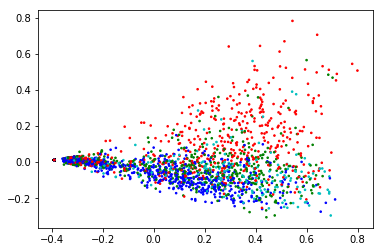

In [21]:
reduced_data = PCA(n_components=2).fit_transform(array)

plt.scatter(reduced_data[:,0], reduced_data[:,1], marker='.', c=colors, s=size)

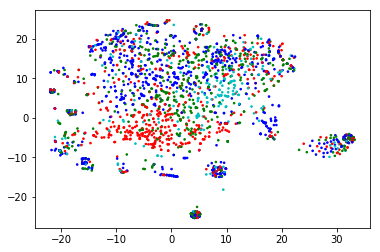

In [20]:
reduced_data = TSNE(n_components=2).fit_transform(array)

plt.scatter(reduced_data[:,0], reduced_data[:,1], marker='.', c=colors, s=size)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

clf = LinearSVC(C=1)

clf.fit(array, documents['category'])

In [ ]:
predicted = clf.predict(map(str, validation_df['title'].values))
np.mean(predicted == validation_df['category'])